In [28]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

In [29]:
hf = h5py.File('gammaray_lab4.h5', 'r')            

In [30]:
hf.keys()

KeysView(<HDF5 file "gammaray_lab4.h5" (mode r)>)

In [31]:
data = np.array(hf.get('data'))

In [32]:
data[:,0]

array([9.40680016e+08, 3.15000000e+02, 4.50000000e+01, 1.00000000e+01])

# Problem 1

1) Down load the data from the course website (gammaray_lab4.h5), and import it into your working environment. The data has 4 columns and more than 25 million rows. The columns are time (in gps seconds), Solar phase (deg) showing the position of the sun relative to the orbit, Earth longitude (deg) giving the position of the spacecraft relative to the ground, and particle counts. Make a few plots, generally exploring your data and making sure you understand it. Give a high level description of the data features you see. Specifically comment on whether you see signal contamination in your data, and how you plan to build a background pdf().

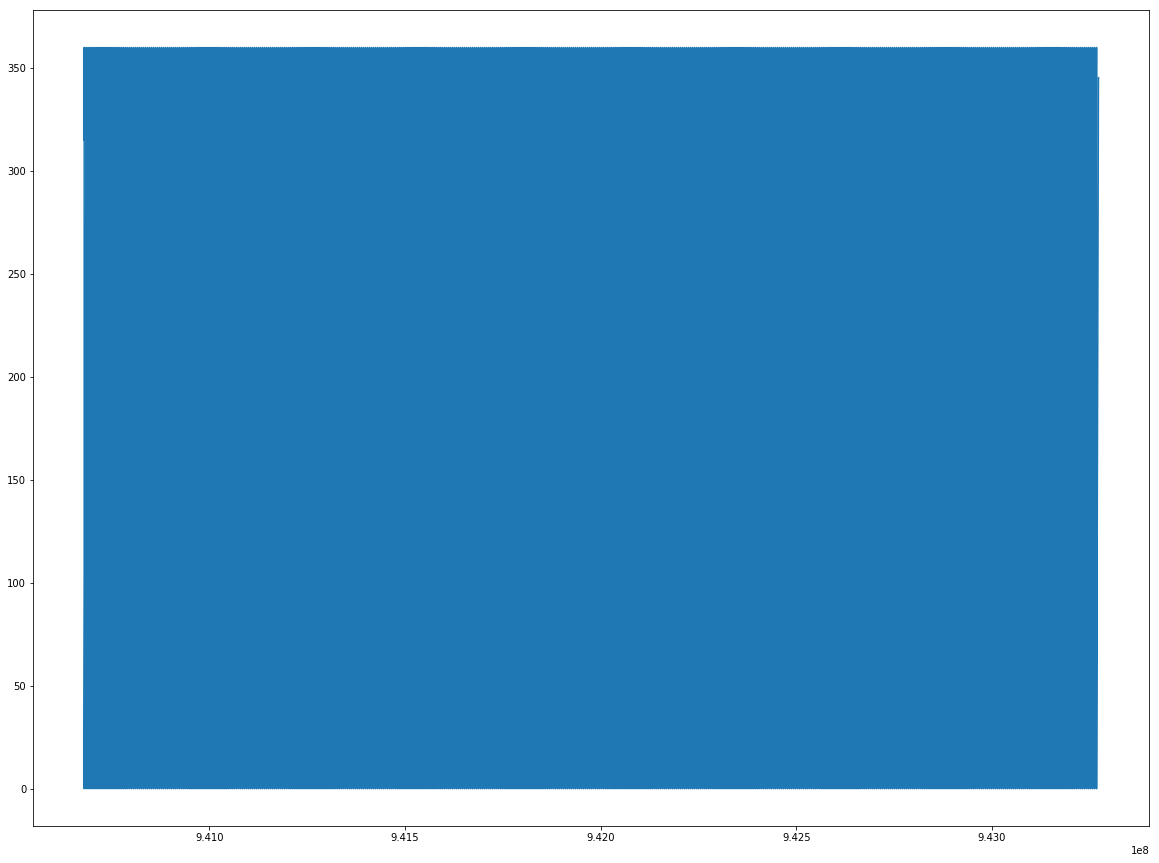

In [33]:
plt.step(data[0,:], data[1,:])

Text(0.5,1,'Earth longitude (deg) vs Time (gps seconds)')

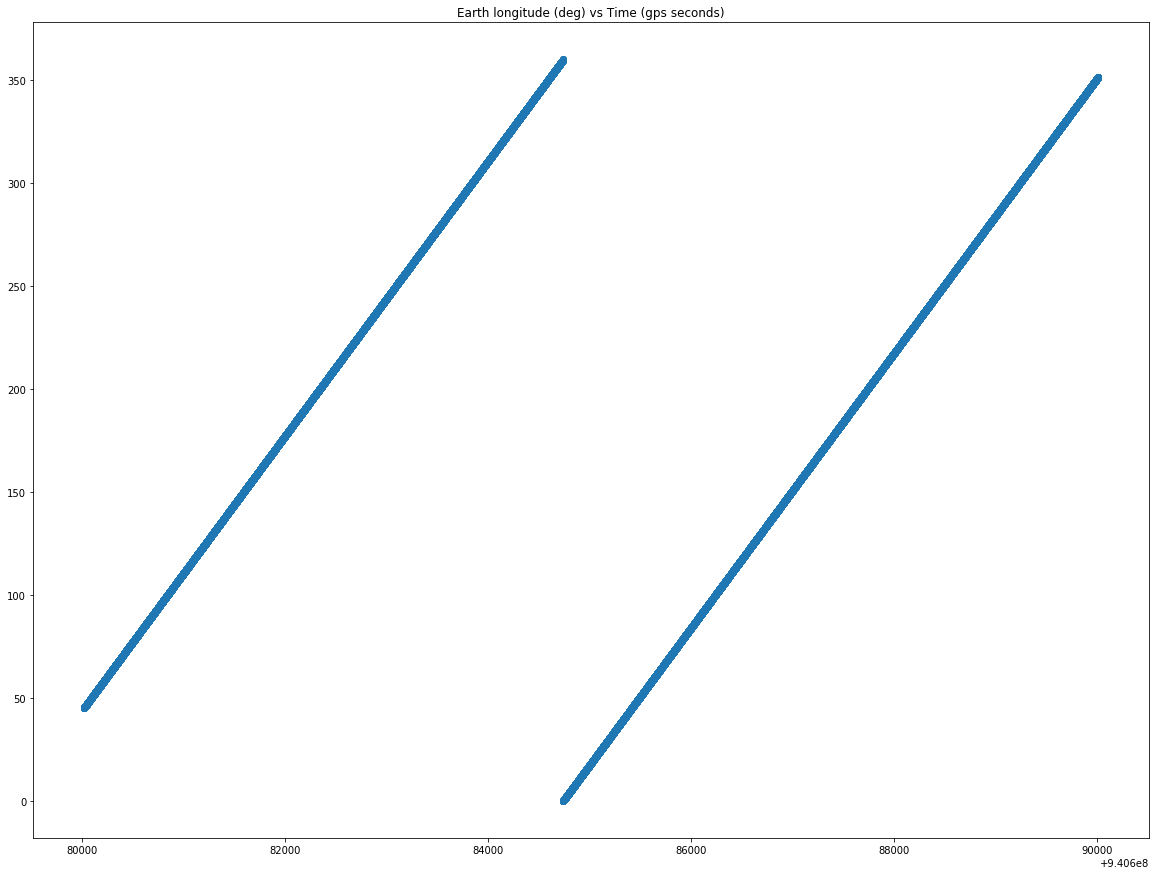

In [34]:
plt.scatter(data[0,1:100000], data[2,1:100000])
plt.title("Earth longitude (deg) vs Time (gps seconds)")

Text(0.5,1,'Solar Phase (deg) vs Time (gps seconds)')

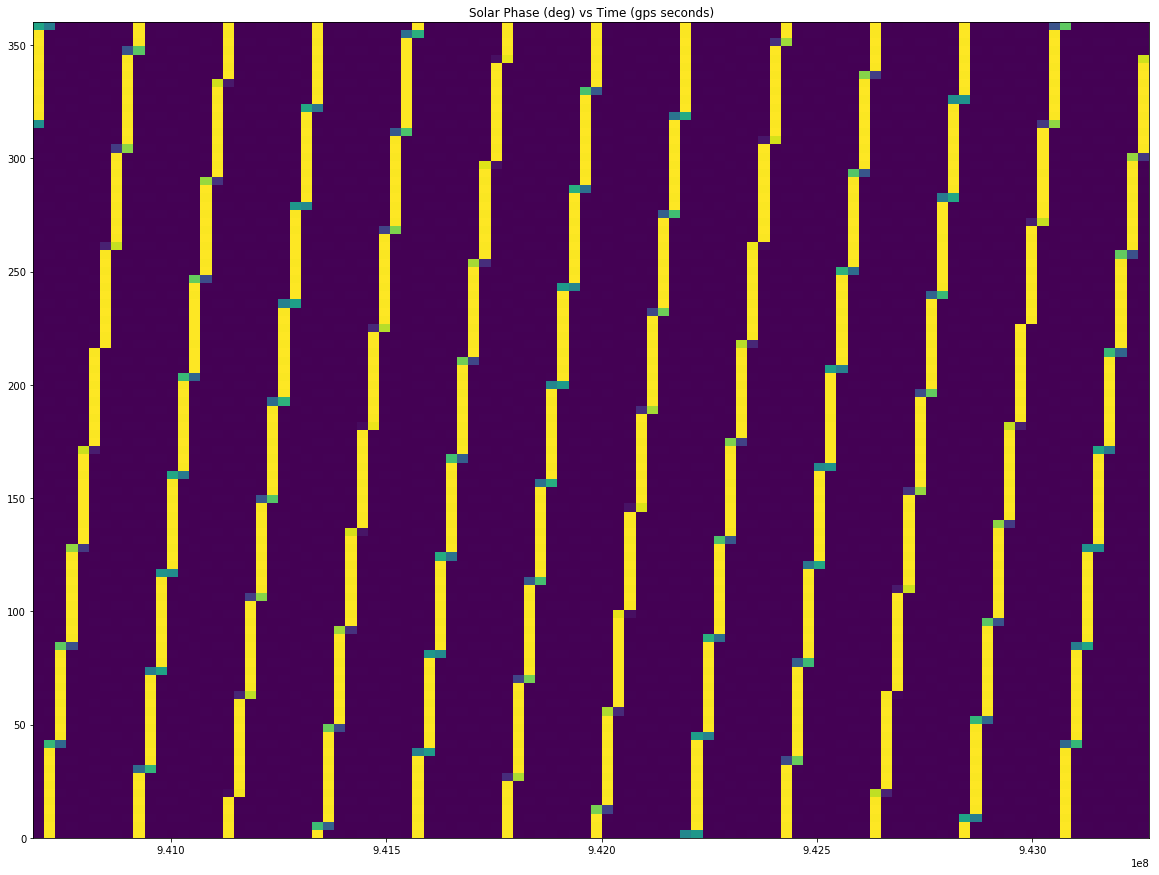

In [35]:
plt.hist2d(data[0,:], data[1,:], bins = 100)
plt.title("Solar Phase (deg) vs Time (gps seconds)")

Text(0.5,1,'Particle Count vs Time (gps seconds)')

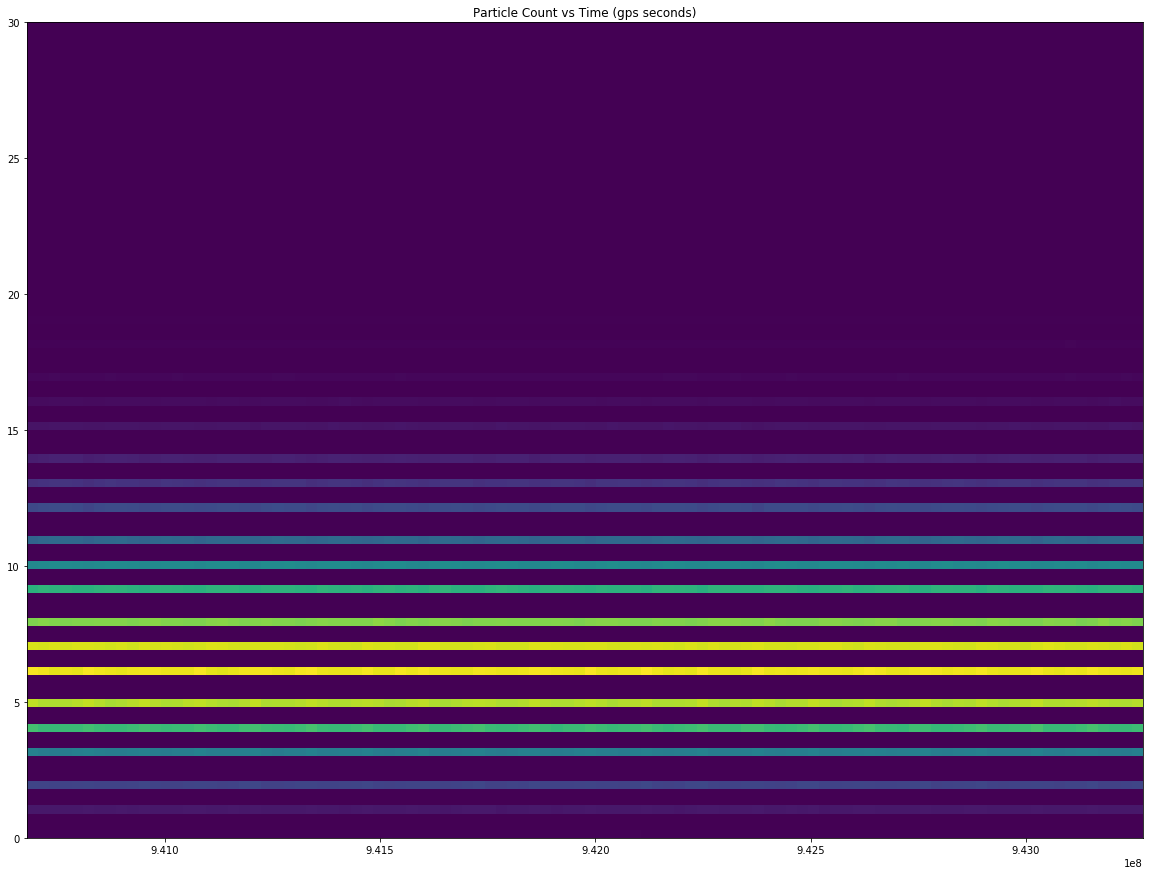

In [21]:
plt.hist2d(data[0,:], data[3,:], bins = 100)
plt.title("Particle Count vs Time (gps seconds)")

Text(0.5,1,'Particle Count vs Longitude')

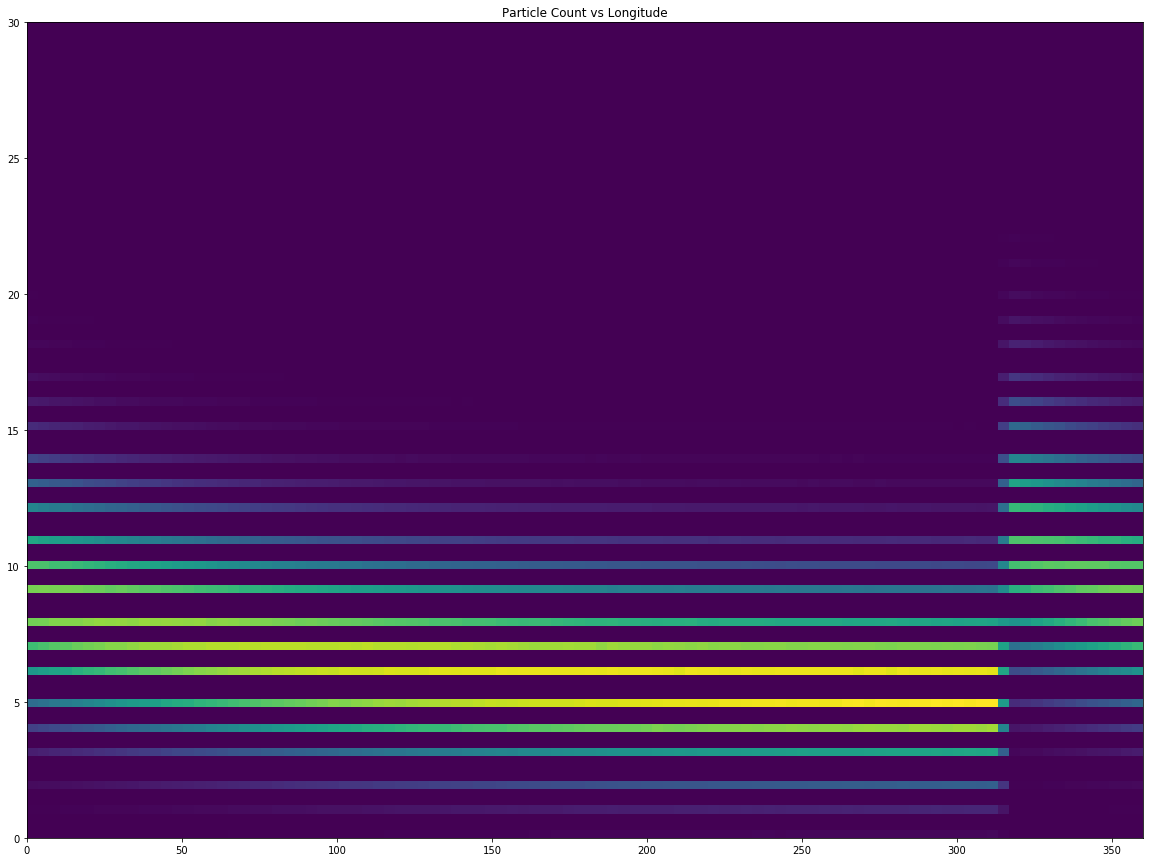

In [25]:
plt.hist2d(data[2,:], data[3,:], bins = 100)
plt.title("Particle Count vs Longitude")

Text(0.5,1,'Particle Count vs Solar Phase')

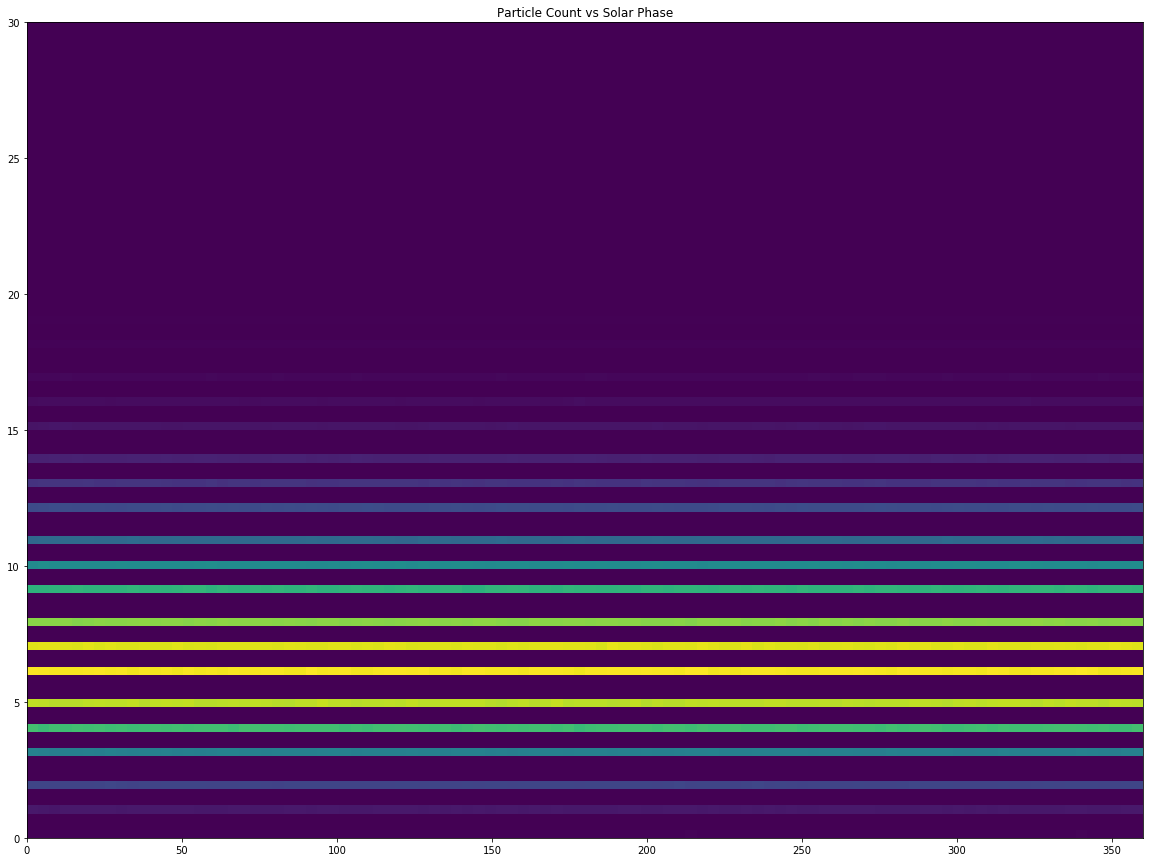

In [29]:
plt.hist2d(data[1,:], data[3,:], bins = 100)
plt.title("Particle Count vs Solar Phase")

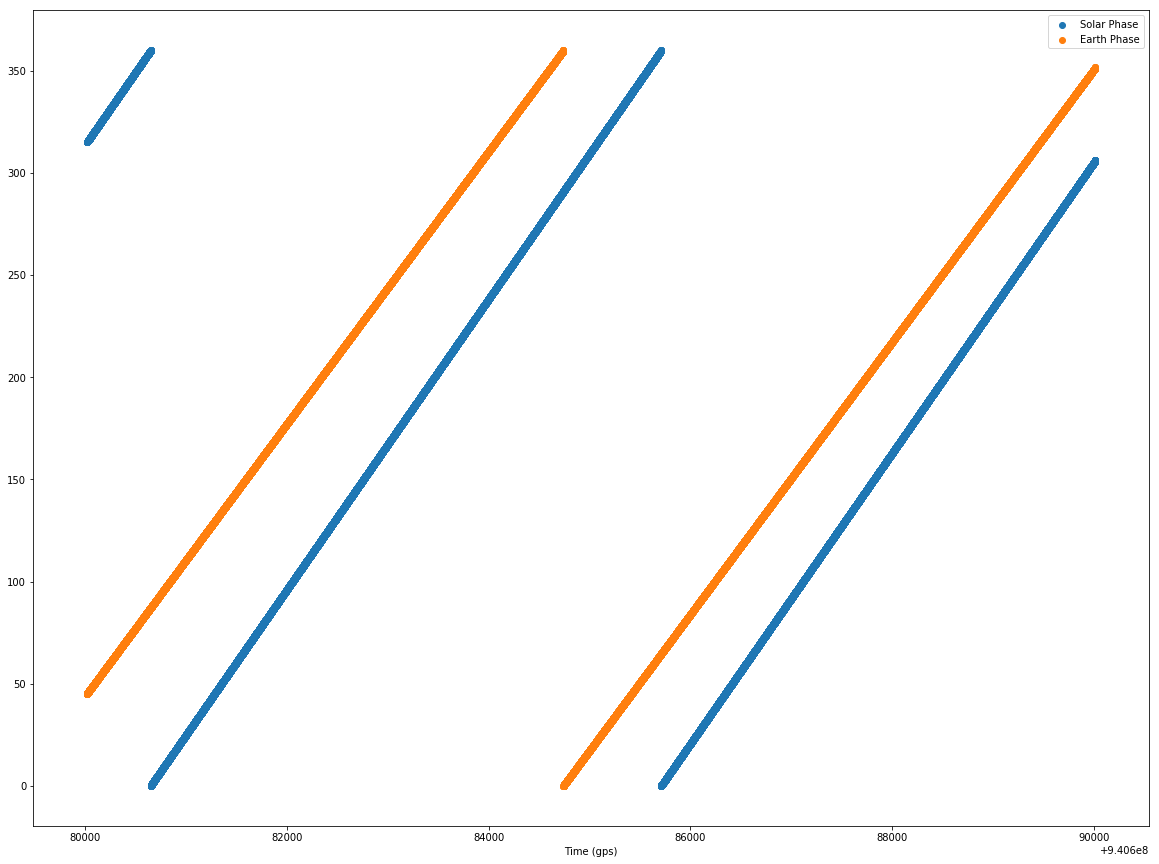

In [36]:
# 2) The background is not consistent across the dataset. Find and describe as accurately as you can how the background 
# changes.
plt.scatter(data[0, 0:100000], data[1, 0:100000], label = "Solar Phase")
plt.scatter(data[0, 0:100000], data[2, 0:100000], label = "Earth Phase")
plt.legend()
plt.xlabel("Time (gps)")
plt.show()

In [41]:
# 3) Create a model for the background that includes time dependence, and explicitly compare your model to the data. 
# How good is your model of the background
def plot_bg(n):

    D = data[(data[2,:] < data[2,n+15])]
    D = D[(data[2,:] >= data[2,n-15])]
    
    mu=D.mean()
    
    x = np.arange(0,30,1)
    plt.plot(x,stats.poisson.pmf(x,mu[3],loc=0), linewidth = 5, alpha = .5,label = "Model")
    plt.hist(D["Particle Count"], bins=np.arange(0,40,1), density=True, color = "red", label =  "Background")
    plt.yscale("Log")
    plt.ylabel("Freq")
    plt.xlabel("Particle Count")
    plt.title("Earth Phase Background")
    plt.legend()
    plt.show()
    

plot_bg(300)
plot_bg(4000)
plot_bg(50000)
plot_bg(900000)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 4 but corresponding boolean dimension is 25920001

In [43]:
# 4) Because the background varies, your discovery sensitivity threshold (how many particles you would need to see) also 
# varies. What is the '5-sigma' threshold for a 100 millisecond GRB at different times?
def fiveSig100m(n):
    #n=1099000

    D = data[(data[2,:] < data[2,n+15])]
    D = D[(data[2,:] >= data[2,n-15])]
    
    mu=D.mean()
    threshold = scipy.stats.poisson.ppf(stats.norm.cdf(5),mu[3], loc=0)
    return(threshold)

times = [5600, 590000, 5840000, 5390, 2038429, 2384203]

for i in range(len(times)):
    print("The 5 sigma threshold {0:1.0f} particle in a 100 millisecond GRB at time {1:1.0f}".format(fiveSig100m(times[i]),data[0, times[i]]))

IndexError: boolean index did not match indexed array along dimension 0; dimension is 4 but corresponding boolean dimension is 25920001

# Problem 2

In [14]:
# 1) Dowload the data from images.h5. This is a stack of 10 square images, each 200 pixels on a side.
hf = h5py.File('images.h5', 'r')
print(hf.keys())
imStack = np.array(hf.get('imagestack'))

KeysView(<HDF5 file "images.h5" (mode r)>)


ValueError: num must be 1 <= num <= 10, not 11

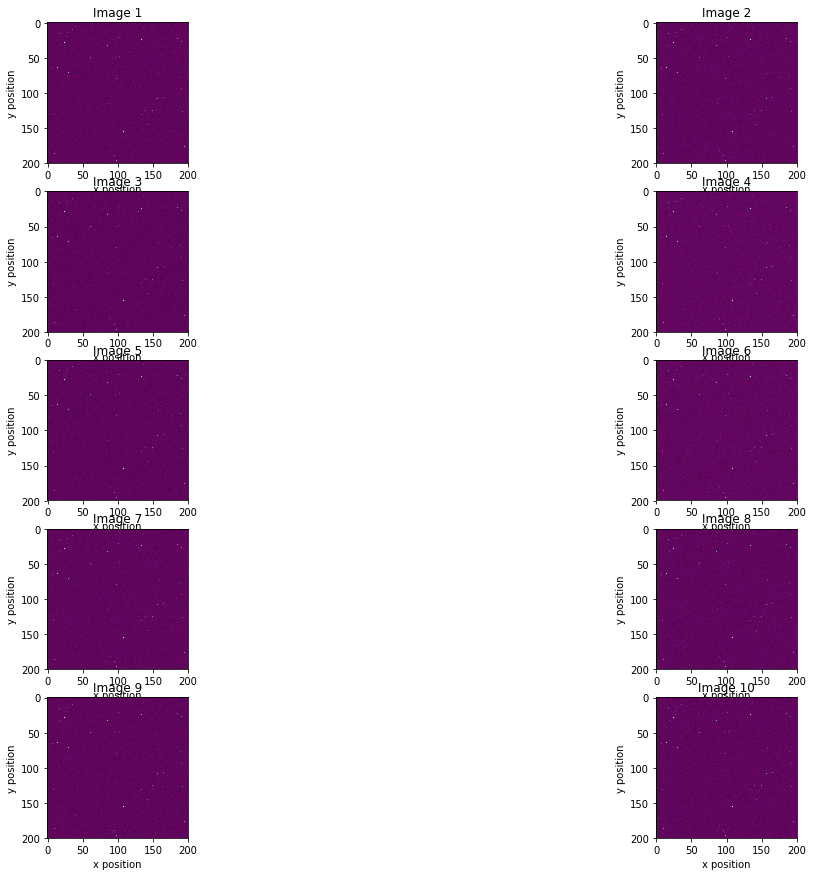

In [42]:
# 2) Explore the data. Is there signal contamination? Is the background time dependent? Is it consistent spatially? 
#Develop a plan to calculate your background pdf().

for i in range(len(imStack)-1):
    plt.subplot(5, 2, i+1)
    plt.title("Image " + str(i+1))
    plt.xlabel("x position")
    plt.ylabel("y position")
    plt.imshow(imStack[:,:,i], cmap=plt.cm.BuPu_r)

plt.show()

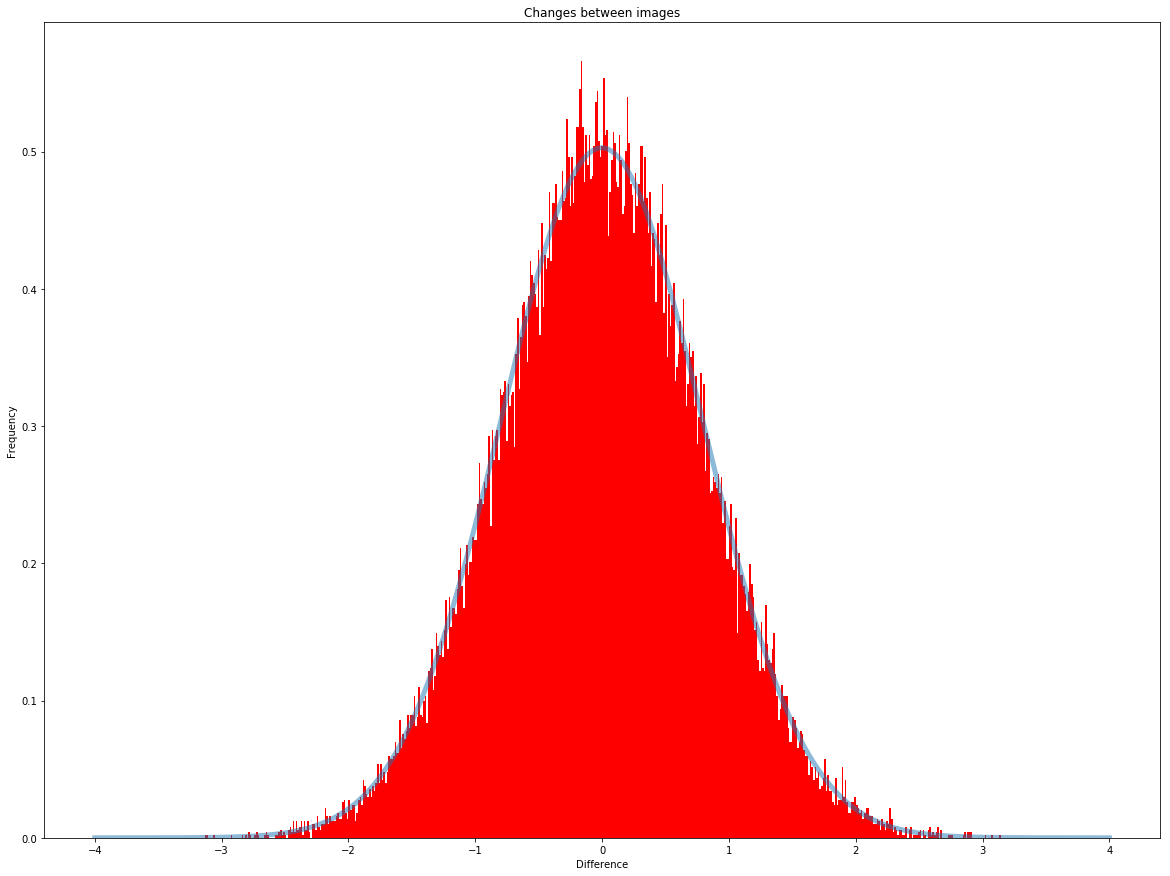

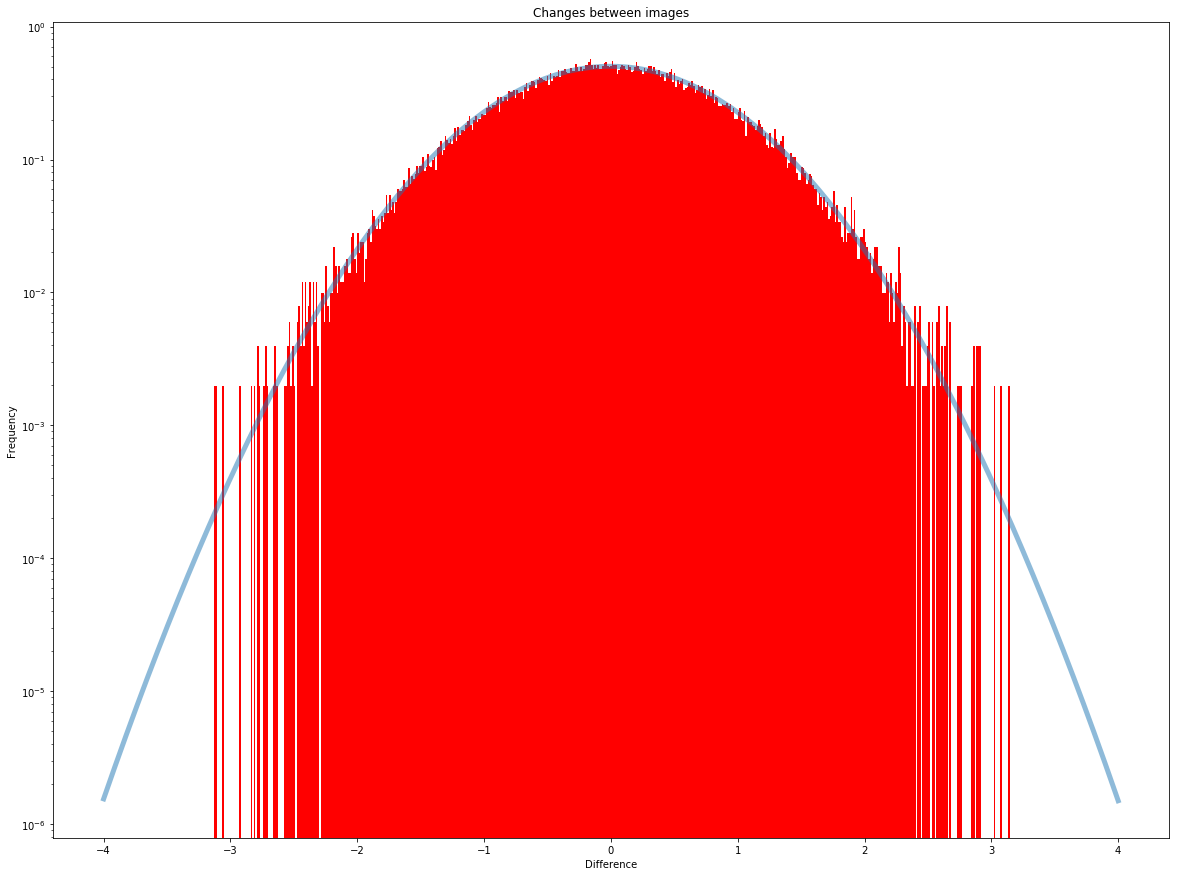

5 sigma event probability: 2.866515718791933e-07


IndexError: invalid index to scalar variable.

In [49]:
# 3) Using your background distribution, hunt for your signal (either faint stars, or a transient). Describe what you find.

for i in range(9):
    subImage = imStack[:,:,i] - imStack[:,:,i+1]
    
changes = np.array([])
for i in range(9):
    for j in range(200):
        changes = np.append(changes,subImage[j])
        

mean=np.mean(changes)
mu =np.sqrt(np.var(changes))
x = np.linspace(-4,4,1000)


fig, ax = plt.subplots(1,1)

ax.plot(x,stats.norm.pdf(x,loc=mean,scale = mu), linewidth = 5, alpha = .5)

plt.hist(changes, bins=500, density= True, color = "red")
plt.xlabel("Difference")
plt.ylabel("Frequency")
plt.title("Changes between images")

fig, ax = plt.subplots(1,1)

ax.plot(x,stats.norm.pdf(x,loc=mean,scale = mu), linewidth = 5, alpha = .5)

plt.hist(changes, bins=500, density= True, color = "red")
plt.yscale("log")
plt.xlabel("Difference")
plt.ylabel("Frequency")
plt.title("Changes between images")
plt.show()

sigma = 5
prob = stats.norm.sf(sigma)
print("5 sigma event probability:", prob)
width = 0.588
max_diff = stats.norm.isf(prob, loc = 0, scale = width)
threshold = max_diff[:,2]
print(f"Pixels with intensities below {threshold} will be considered faint stars.")

faintstars = []

for i in range(len(changes)):
    if changes[i] <= threshold:
        faintstars.append(changes[i])       

print("Given 5 sigma bound and maximum intensity of {theshold} there were: ", len(transients), "faint stars present")

##### 4) You and your lab partner had different pdf(), but were using the same data. Explore why this is.
We had different PDFs due to the nature of what we were searching for. We were each looking for different values, which naturally occur at different frequencies.